<a href="https://www.kaggle.com/code/mosesmoncy/room-occupancy-iot-sensor?scriptVersionId=129688362" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In today's rapidly advancing world, the Internet of Things (IoT) has transformed various aspects of our lives, from smart homes to connected cities. One remarkable application of IoT technology is the prediction of room occupancy using sensors, enabling efficient resource management and enhanced user experience. In this blog, we will explore how machine learning techniques can be leveraged to predict room occupancy accurately and delve into the benefits it brings to the table.

Model is created to predict the 'Occupancy' of the room using Classification Models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
a=pd.read_csv('/kaggle/input/occupancy-csv/Occupancy.csv')
a

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,1


In [4]:
# read first five data

a.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [5]:
# read last five data

a.tail()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
20555,2015-02-18 09:15:00,20.815,27.7175,429.75,1505.25,0.004213,1
20556,2015-02-18 09:16:00,20.865,27.7450,423.50,1514.50,0.004230,1
20557,2015-02-18 09:16:59,20.890,27.7450,423.50,1521.50,0.004237,1
20558,2015-02-18 09:17:59,20.890,28.0225,418.75,1632.00,0.004279,1
20559,2015-02-18 09:19:00,21.000,28.1000,409.00,1864.00,0.004321,1


In [6]:
a.shape

(20560, 7)

In [7]:
a.describe

<bound method NDFrame.describe of                       date  Temperature  Humidity       Light          CO2  \
0      2015-02-02 14:19:00      23.7000   26.2720  585.200000   749.200000   
1      2015-02-02 14:19:59      23.7180   26.2900  578.400000   760.400000   
2      2015-02-02 14:21:00      23.7300   26.2300  572.666667   769.666667   
3      2015-02-02 14:22:00      23.7225   26.1250  493.750000   774.750000   
4      2015-02-02 14:23:00      23.7540   26.2000  488.600000   779.000000   
...                    ...          ...       ...         ...          ...   
20555  2015-02-18 09:15:00      20.8150   27.7175  429.750000  1505.250000   
20556  2015-02-18 09:16:00      20.8650   27.7450  423.500000  1514.500000   
20557  2015-02-18 09:16:59      20.8900   27.7450  423.500000  1521.500000   
20558  2015-02-18 09:17:59      20.8900   28.0225  418.750000  1632.000000   
20559  2015-02-18 09:19:00      21.0000   28.1000  409.000000  1864.000000   

       HumidityRatio  Occupan

In [8]:
a.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [9]:
a.isna().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

0    15810
1     4750
Name: Occupancy, dtype: int64


<AxesSubplot: xlabel='Occupancy', ylabel='count'>

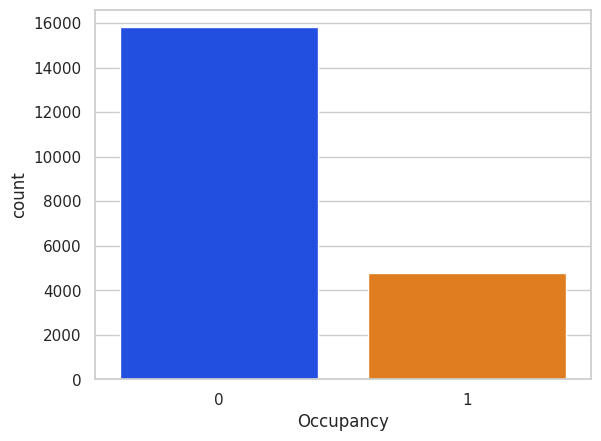

In [10]:
a_Occupancy = a['Occupancy'].value_counts()
print(a_Occupancy)

sns.set(style = 'whitegrid')
sns.countplot(x="Occupancy", data=a, palette='bright')

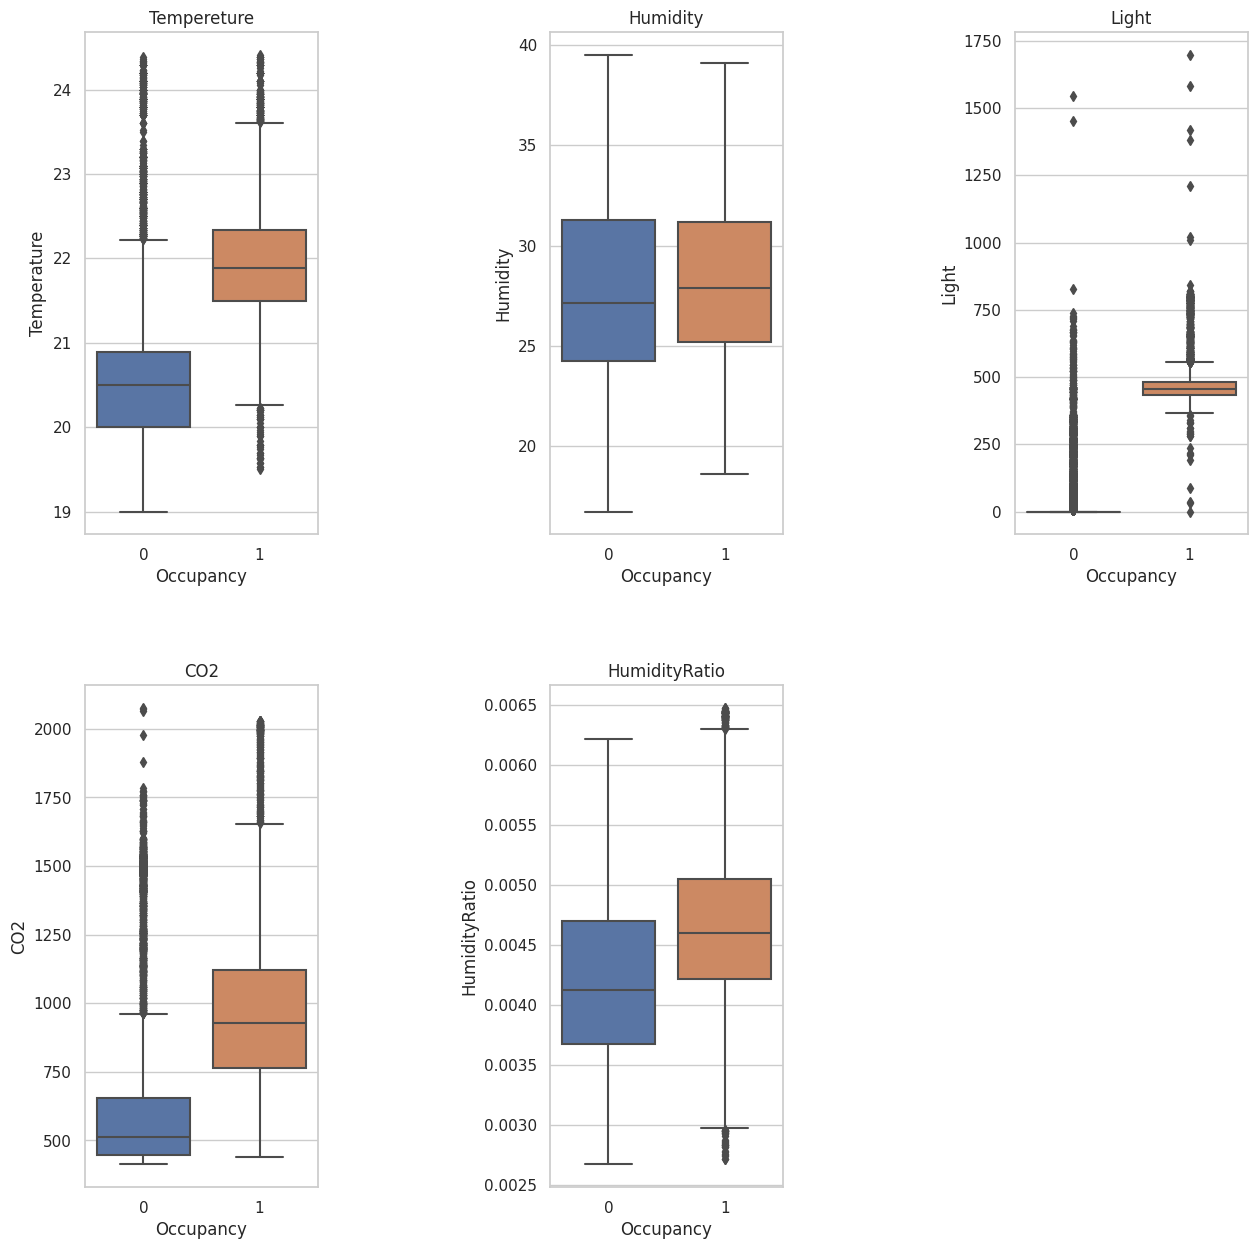

In [11]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2, 3, 1)
sns.boxplot(x='Occupancy', y='Temperature', data=a, showfliers=True, ax=ax)
ax.set_title('Tempereture')
ax = fig.add_subplot(2, 3, 2)
sns.boxplot(x='Occupancy', y='Humidity', data=a, showfliers=True, ax=ax)
ax.set_title('Humidity')
ax = fig.add_subplot(2, 3, 3)
sns.boxplot(x='Occupancy', y='Light', data=a, showfliers=True, ax=ax)
ax.set_title('Light')
ax = fig.add_subplot(2, 3, 4)
sns.boxplot(x='Occupancy', y='CO2', data=a, showfliers=True, ax=ax)
ax.set_title('CO2')
ax = fig.add_subplot(2, 3, 5)
sns.boxplot(x='Occupancy', y='HumidityRatio', data=a, showfliers=True, ax=ax)
ax.set_title('HumidityRatio')

plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=1)
plt.show()

<AxesSubplot: >

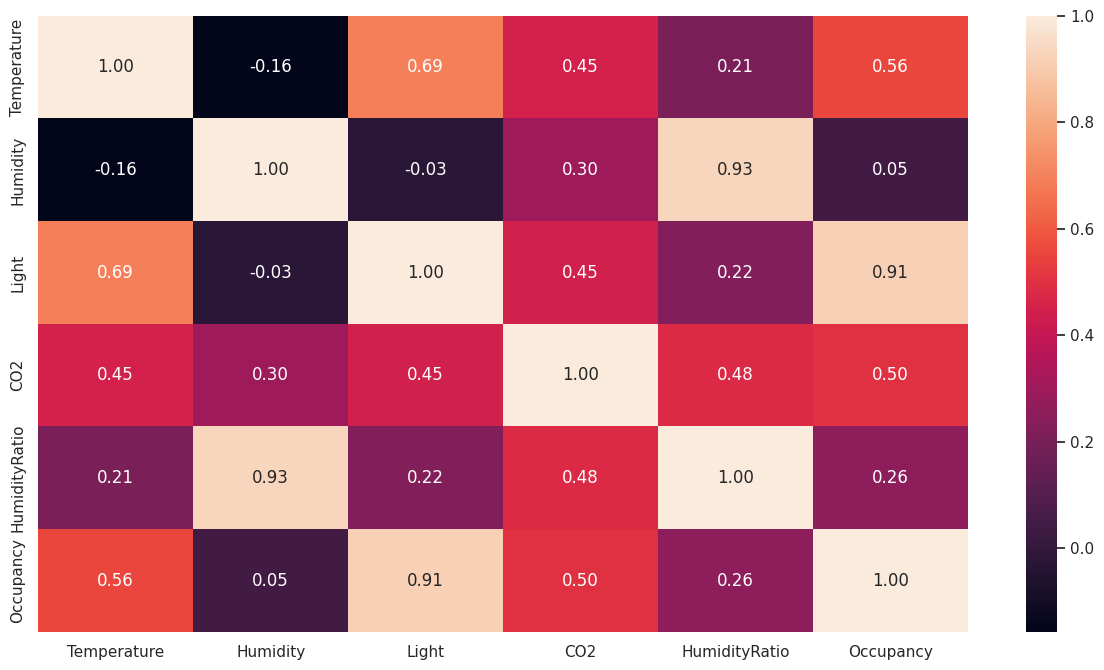

In [12]:
plt.figure(figsize = (15,8))
sns.heatmap(a.corr(),annot=True, fmt="1.2f")

In [13]:
# Since 'Date' is an object

# Using LabelEncoder

from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()

col=['date']
a[col]=a[col].apply(la.fit_transform)

In [14]:
a.dtypes

date               int64
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

<AxesSubplot: xlabel='HumidityRatio', ylabel='Count'>

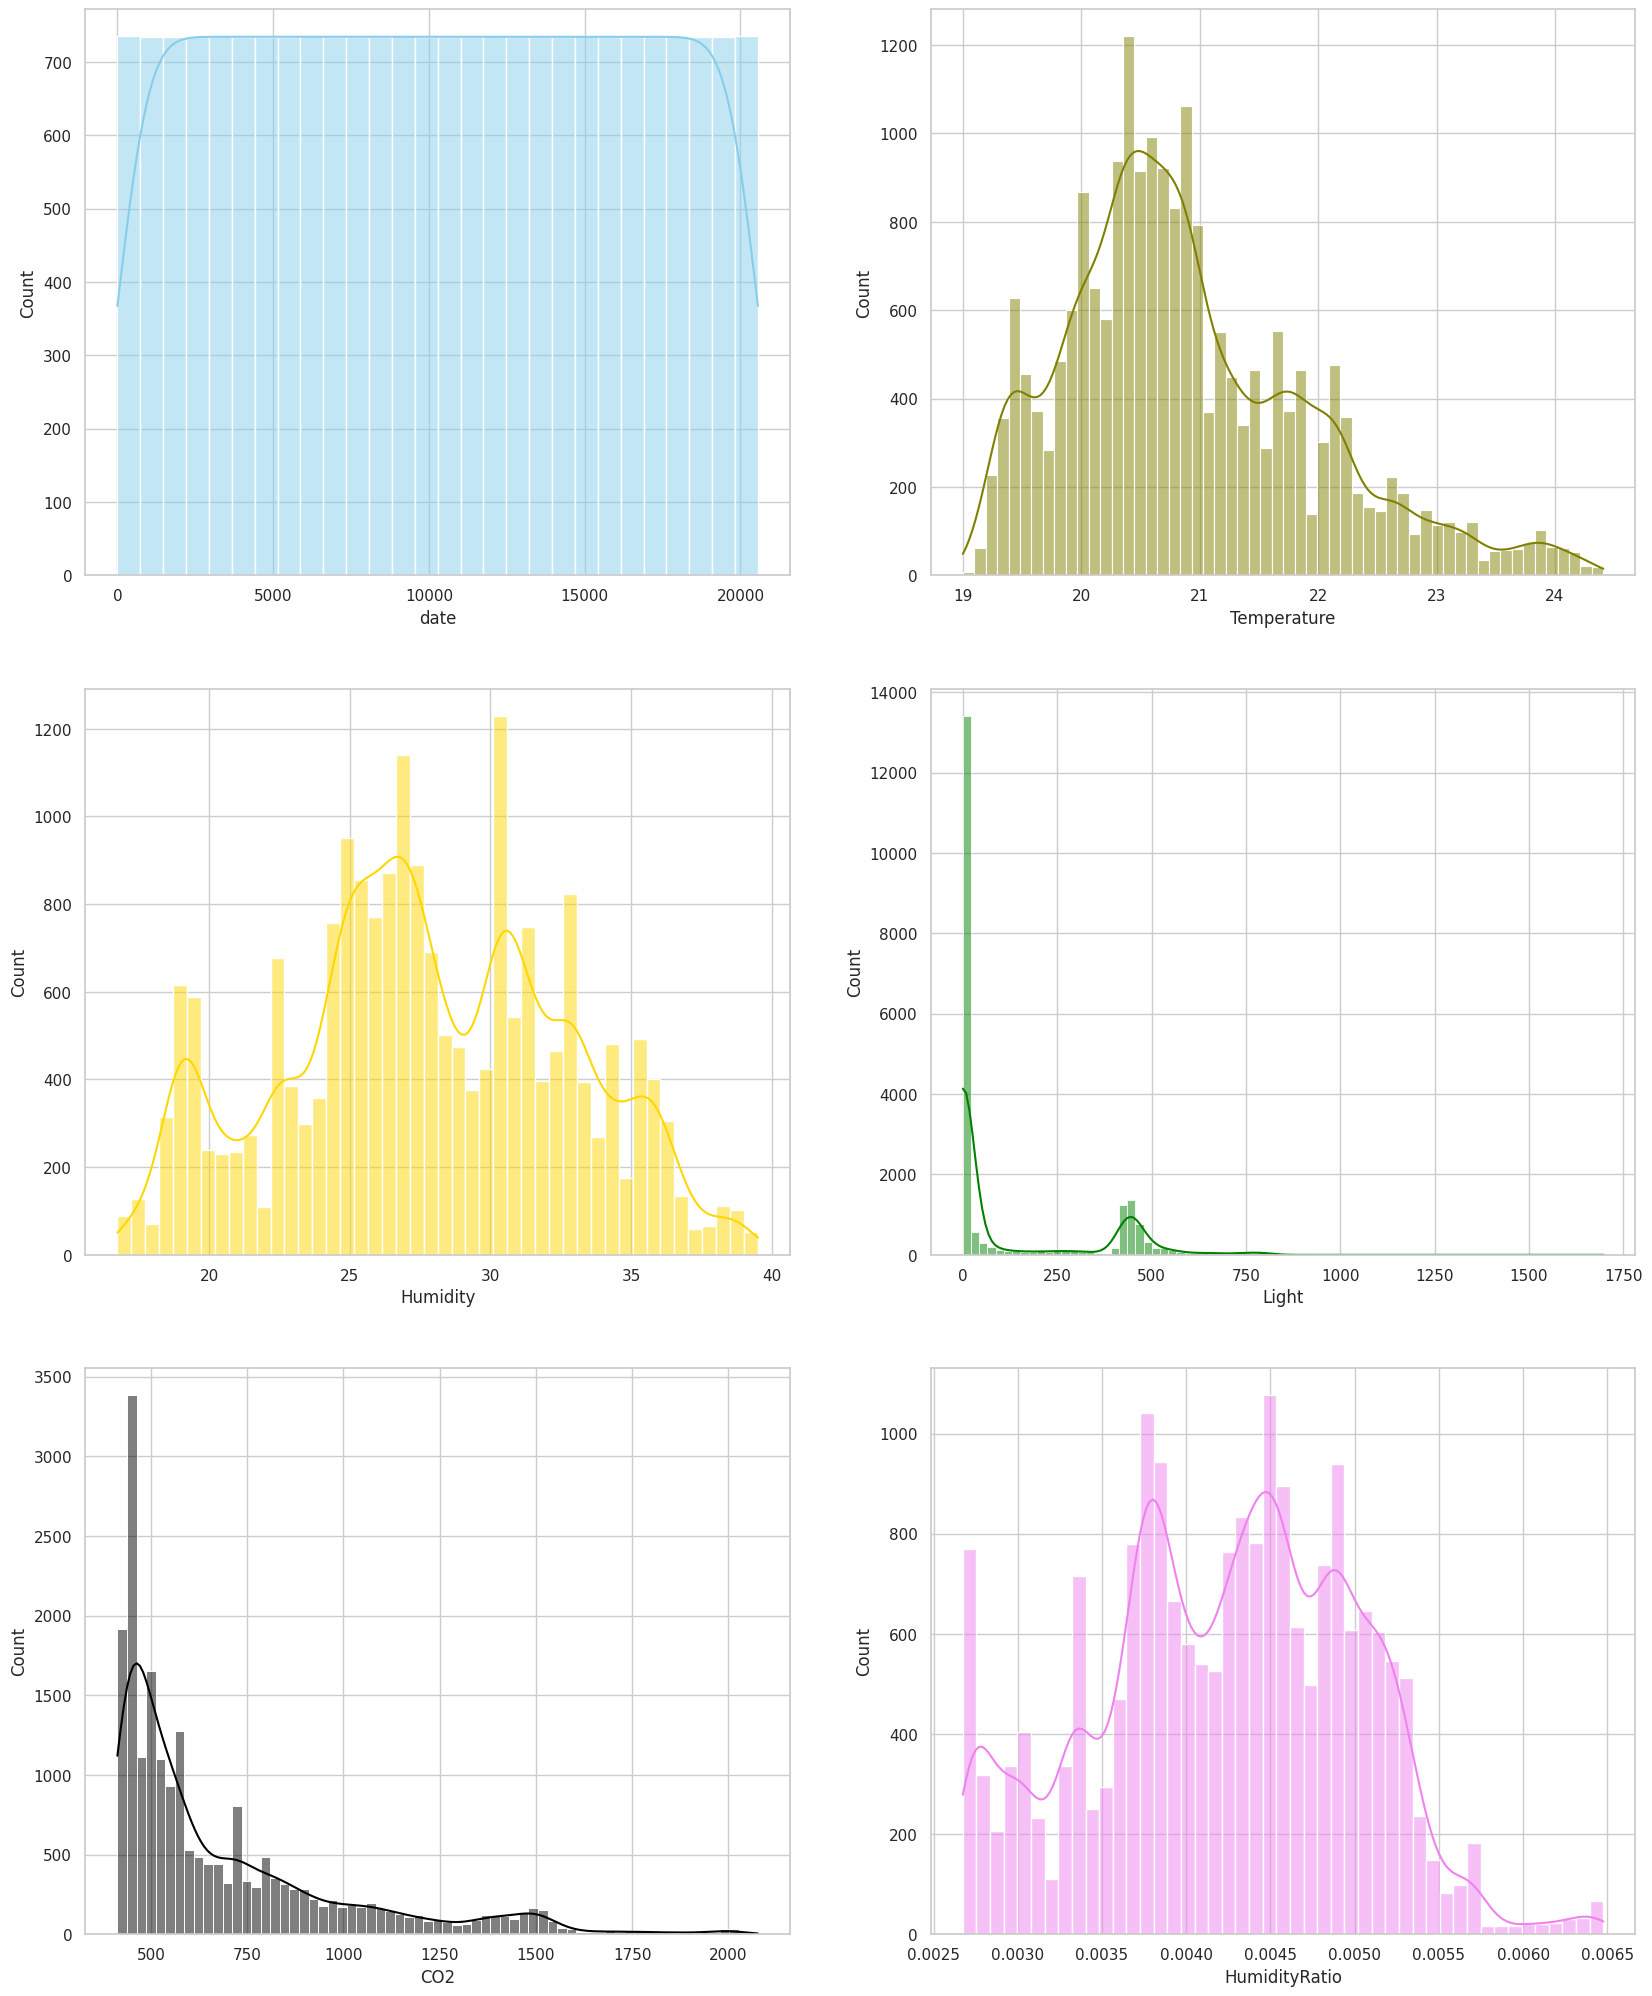

In [15]:
fig, axs = plt.subplots(3, 2, figsize=(20, 25))

sns.histplot(data=a['date'], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=a['Temperature'], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=a['Humidity'], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=a['Light'], kde=True, color="green", ax=axs[1, 1])
sns.histplot(data=a['CO2'], kde=True, color="black", ax=axs[2, 0])
sns.histplot(data=a['HumidityRatio'], kde=True, color="violet", ax=axs[2, 1])

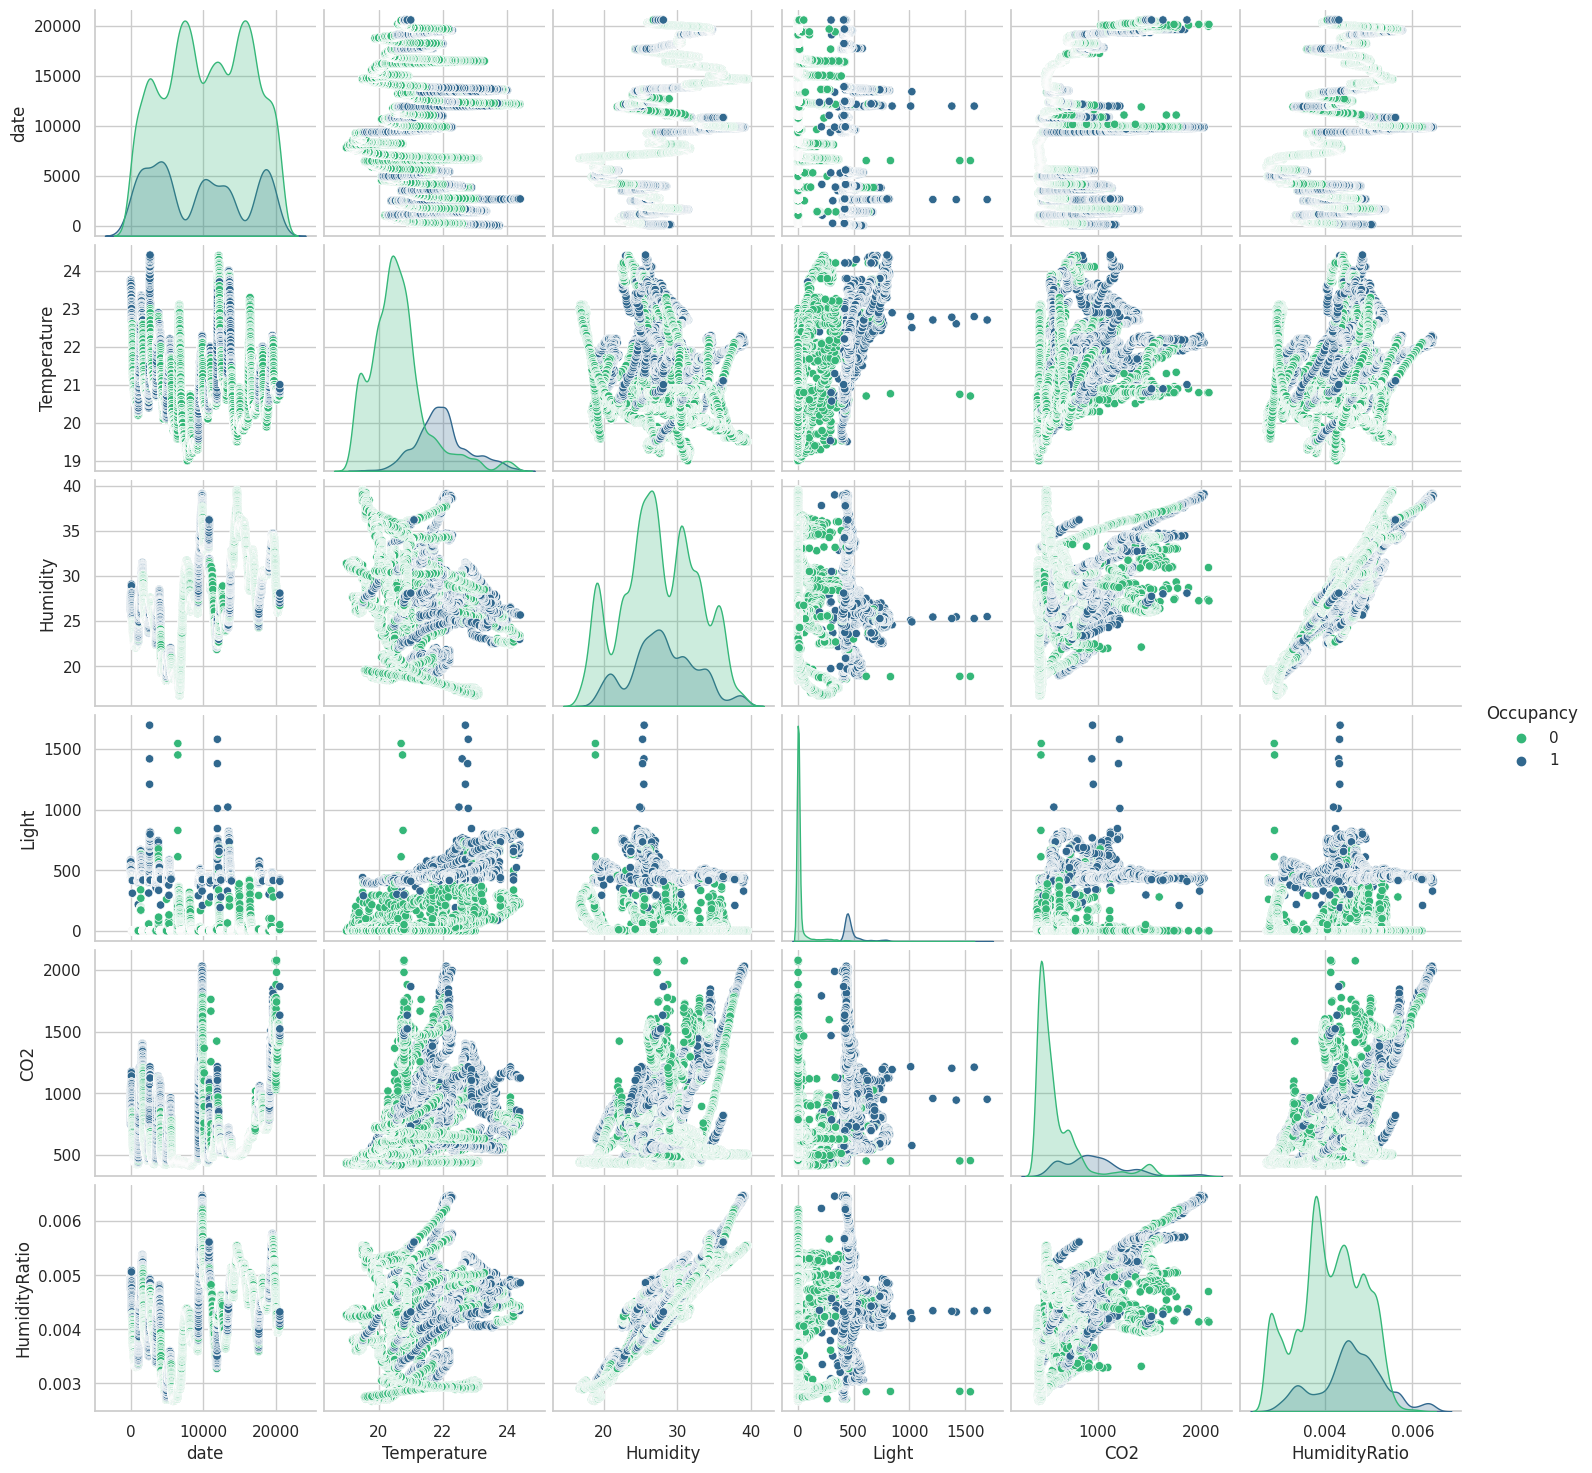

In [16]:
sns.pairplot(a,hue='Occupancy',palette='viridis_r')

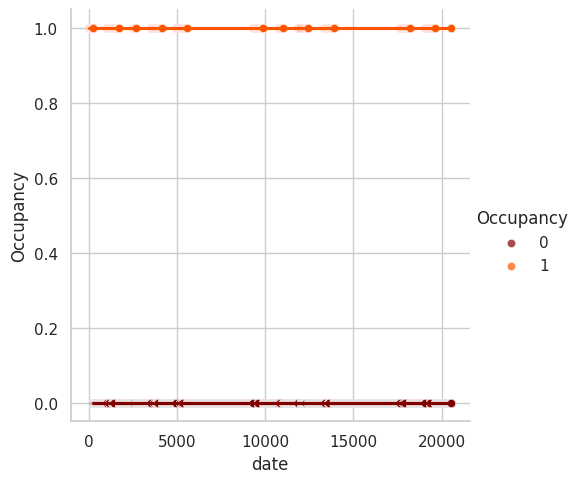

In [17]:
sns.lmplot(x = 'date', y = 'Occupancy', data = a, hue='Occupancy',
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

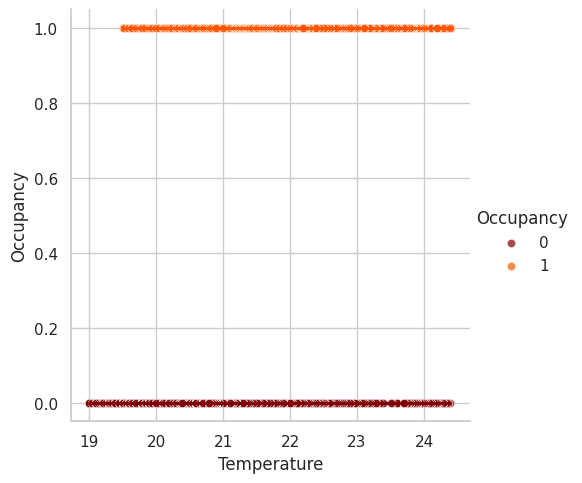

In [18]:
sns.lmplot(x = 'Temperature', y = 'Occupancy', data = a, hue='Occupancy',
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

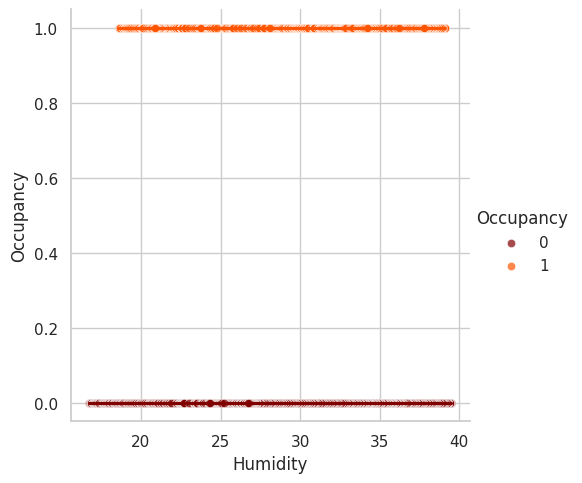

In [19]:
sns.lmplot(x = 'Humidity', y = 'Occupancy', data = a, hue='Occupancy',
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

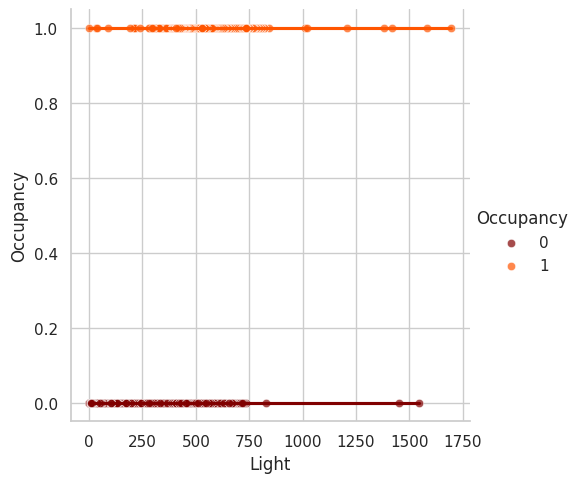

In [20]:
sns.lmplot(x = 'Light', y = 'Occupancy', data = a, hue='Occupancy',
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

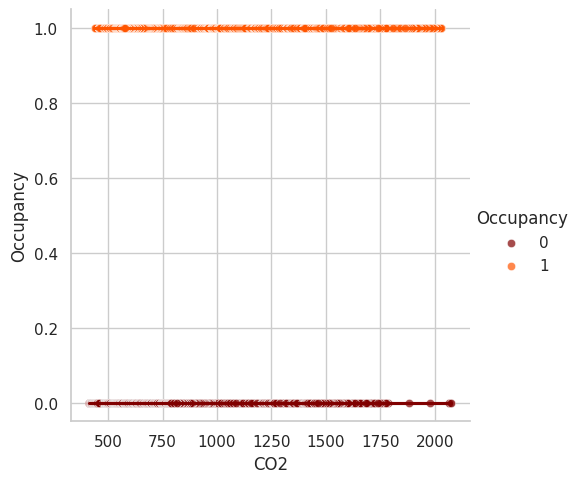

In [21]:
sns.lmplot(x = 'CO2', y = 'Occupancy', data = a, hue='Occupancy',
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

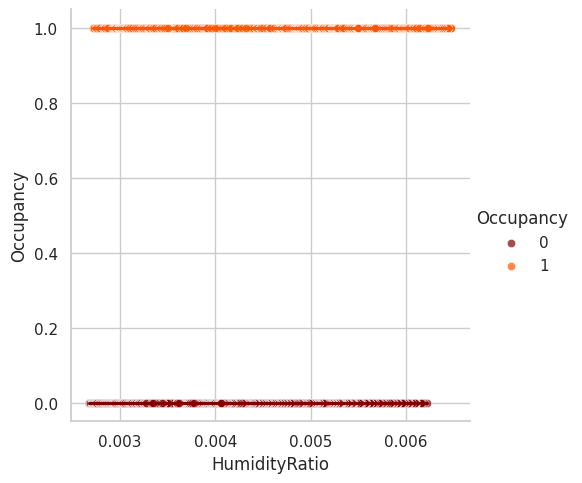

In [22]:
sns.lmplot(x = 'HumidityRatio', y = 'Occupancy', data = a, hue='Occupancy',
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [23]:
#Lets find out the number of cars in each evaluation category
a['Occupancy'].value_counts().sort_index()

0    15810
1     4750
Name: Occupancy, dtype: int64

In [24]:
fig = {
  "data": [
    {
      "values": [15810,4750],
      "labels": [
        "0",
        "1",
      ],
      "domain": {"column": 0},
      "name": "Occupancy Evaluation",
      "hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    }],
  "layout": {
        "title":"Distribution of Occupancy Evaluation",
        "grid": {"rows": 1, "columns": 1},
        "annotations": [
            {
                "font": {
                    "size": 36
                },
                "showarrow": False,
                "text": "",
                "x": 0.5,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='cars_donut')

In [25]:
a.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [26]:
features = a.iloc[:,:-1]
features[:5]
a1=[]
for i in features:
    a1.append(features[i].value_counts())

In [27]:
date = pd.crosstab(a['date'], a['Occupancy'])
temp = pd.crosstab(a['Temperature'], a['Occupancy'])
hum = pd.crosstab(a['Humidity'], a['Occupancy'])
light = pd.crosstab(a['Light'], a['Occupancy'])
co2 = pd.crosstab(a['CO2'], a['Occupancy'])
humrate = pd.crosstab(a['HumidityRatio'], a['Occupancy'])

In [28]:
# splitting x(inputs) and y(outputs)

x=a.drop(['Occupancy'],axis=1)
y=a['Occupancy']
x

,date,Temperature,Humidity,Light,CO2,HumidityRatio
0,0,23.7000,26.2720,585.200000,749.200000,0.004764
1,1,23.7180,26.2900,578.400000,760.400000,0.004773
2,2,23.7300,26.2300,572.666667,769.666667,0.004765
3,3,23.7225,26.1250,493.750000,774.750000,0.004744
4,4,23.7540,26.2000,488.600000,779.000000,0.004767
...,...,...,...,...,...,...
20555,20555,20.8150,27.7175,429.750000,1505.250000,0.004213
20556,20556,20.8650,27.7450,423.500000,1514.500000,0.004230
20557,20557,20.8900,27.7450,423.500000,1521.500000,0.004237
20558,20558,20.8900,28.0225,418.750000,1632.000000,0.004279


In [29]:
y

0        1
1        1
2        1
3        1
4        1
        ..
20555    1
20556    1
20557    1
20558    1
20559    1
Name: Occupancy, Length: 20560, dtype: int64

In [30]:
# Splitting Training and Testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [31]:
# Preprocessing Steps

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test-scalar.fit_transform(x_test)

,date,Temperature,Humidity,Light,CO2,HumidityRatio
17775,17773.727901,20.922371,27.821542,452.462602,1018.436738,-0.225473
5971,5971.733304,20.845040,20.445682,0.618779,438.810094,2.007585
11804,11803.742325,20.869645,23.499374,0.618779,734.354892,1.166107
18114,18112.670307,20.937662,29.383772,427.581335,933.710573,-0.739883
290,291.698460,20.922371,24.825266,0.618779,617.233429,0.548088
...,...,...,...,...,...,...
15939,15938.039822,20.848555,31.715099,0.618779,552.442833,-0.672839
6286,6286.679788,20.827465,21.051881,0.618779,442.797208,1.939858
1488,1489.494930,21.006732,29.347720,467.391363,1231.996512,-1.250961
4907,4907.914069,20.853828,20.392273,0.618779,430.835867,1.983913


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [33]:
#Using logistic regression
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
lr_train_acc=lr.score(x_train, y_train)
lr_test_acc=lr.score(x_test, y_test)
print("Training Accuracy: ",lr_train_acc)
print("Testing Accuracy: ", lr_test_acc)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('The Accuracy Score is',accuracy_score(y_test,y_pred))
print('Classification Report is',classification_report(y_test,y_pred))

Training Accuracy:  0.988396331295164
Testing Accuracy:  0.8216601815823605
[[3655 1099]
 [   1 1413]]
The Accuracy Score is 0.8216601815823605
Classification Report is               precision    recall  f1-score   support

           0       1.00      0.77      0.87      4754
           1       0.56      1.00      0.72      1414

    accuracy                           0.82      6168
   macro avg       0.78      0.88      0.79      6168
weighted avg       0.90      0.82      0.83      6168



In [34]:
# Implementing 5 Classification Models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [35]:
#Using KNN classifier

knn= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_train_acc=knn.score(x_train, y_train)
knn_test_acc=knn.score(x_test, y_test)
print("Training Accuracy: ",knn_train_acc)
print("Testing Accuracy: ", knn_test_acc)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('The Accuracy Score is',accuracy_score(y_test,y_pred))
print('Classification Report is',classification_report(y_test,y_pred))

Training Accuracy:  0.9949972206781545
Testing Accuracy:  0.5695525291828794
[[2258 2496]
 [ 159 1255]]
The Accuracy Score is 0.5695525291828794
Classification Report is               precision    recall  f1-score   support

           0       0.93      0.47      0.63      4754
           1       0.33      0.89      0.49      1414

    accuracy                           0.57      6168
   macro avg       0.63      0.68      0.56      6168
weighted avg       0.80      0.57      0.60      6168



In [36]:
#Using Decision Tree classifier
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
dt_train_acc=dt.score(x_train, y_train)
dt_test_acc=dt.score(x_test, y_test)

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred)) 
print('Training Score: ', dt_train_acc)
print('Testing Score: ', dt_test_acc)
print('The Accuracy Score is',accuracy_score(y_test,y_pred))
print('Classification Report is',classification_report(y_test,y_pred))

Confusion Matrix: 
 [[3823  931]
 [   0 1414]]
Training Score:  0.9923568649249583
Testing Score:  0.8490596627756161
The Accuracy Score is 0.8490596627756161
Classification Report is               precision    recall  f1-score   support

           0       1.00      0.80      0.89      4754
           1       0.60      1.00      0.75      1414

    accuracy                           0.85      6168
   macro avg       0.80      0.90      0.82      6168
weighted avg       0.91      0.85      0.86      6168



In [37]:
# using Random Forest Classifier
rf = RandomForestClassifier(n_estimators= 150, max_depth= 5)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
rf_train_acc = rf.score(x_train, y_train) 
rf_test_acc = rf.score(x_test, y_test)

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Training Score: ', rf_train_acc)
print('Testing Score: ', rf_test_acc)
print('The Accuracy Score is',accuracy_score(y_test,y_pred))
print('Classification Report is',classification_report(y_test,y_pred))

Confusion Matrix: 
 [[3823  931]
 [   0 1414]]
Training Score:  0.9902028904947193
Testing Score:  0.8490596627756161
The Accuracy Score is 0.8490596627756161
Classification Report is               precision    recall  f1-score   support

           0       1.00      0.80      0.89      4754
           1       0.60      1.00      0.75      1414

    accuracy                           0.85      6168
   macro avg       0.80      0.90      0.82      6168
weighted avg       0.91      0.85      0.86      6168



In [38]:
# Using Support Vector Classifier
svc=SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
svc_train_acc = svc.score(x_train, y_train) 
svc_test_acc = svc.score(x_test, y_test)

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Training Score: ', svc_train_acc)
print('Testing Score: ', svc_test_acc)
print('The Accuracy Score is',accuracy_score(y_test,y_pred))
print('Classification Report is',classification_report(y_test,y_pred))

Confusion Matrix: 
 [[4754    0]
 [1414    0]]
Training Score:  0.9890216787103947
Testing Score:  0.7707522697795072
The Accuracy Score is 0.7707522697795072
Classification Report is               precision    recall  f1-score   support

           0       0.77      1.00      0.87      4754
           1       0.00      0.00      0.00      1414

    accuracy                           0.77      6168
   macro avg       0.39      0.50      0.44      6168
weighted avg       0.59      0.77      0.67      6168



In [39]:
# using GaussianNB classifier

gnb=GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
gnb_train_acc = gnb.score(x_train, y_train) 
gnb_test_acc = gnb.score(x_test, y_test)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Training Score: ', gnb_train_acc)
print('Testing Score: ', gnb_test_acc)
print('The Accuracy Score is',accuracy_score(y_test,y_pred))
print('Classification Report is',classification_report(y_test,y_pred))

Confusion Matrix: 
 [[   0 4754]
 [   0 1414]]
Training Score:  0.9677598665925514
Testing Score:  0.22924773022049286
The Accuracy Score is 0.22924773022049286
Classification Report is               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4754
           1       0.23      1.00      0.37      1414

    accuracy                           0.23      6168
   macro avg       0.11      0.50      0.19      6168
weighted avg       0.05      0.23      0.09      6168



In [40]:
x = ['Logistic Regression', 'KNN', 'Decision Tree Classifier','Random Forest Classifier','Support Vector Classifier','GaussianNB']
y1 = [lr_train_acc, knn_train_acc,dt_train_acc,rf_train_acc,svc_train_acc, gnb_train_acc]
y2 = [lr_test_acc, knn_test_acc,dt_test_acc,rf_test_acc,svc_test_acc, gnb_test_acc]

trace1 = go.Bar(x = x, y = y1, name = 'Training Accuracy', marker = dict(color = 'cyan'))
trace2 = go.Bar(x = x, y = y2, name = 'Testing Accuracy', marker = dict(color = 'violet'))
data = [trace1,trace2]
layout = go.Layout(title = 'Accuracy Plot', width = 750)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)